In [128]:
# python libraries
import matplotlib.pyplot as plt  # plotting
import pandas as pd # stats
import scipy.signal as sig # signals
import numpy as np

In [129]:
%matplotlib inline
#%matplotlib notebook

In [130]:
class Prof(object):

    def __init__(self, pdf, scl, dx):
        self.scl = scl  # scaling factor
        self.pdf = pdf*scl  # pandas dataframe holding the profiles
        self.dx = dx*scl  # data spacing
        self.n = len(pdf.index)  # number of data points
        self.fs = 1/self.dx  # sampling frequency
        self.nyq = self.fs/2

In [131]:
pdf = pd.read_csv('prof.csv')
scl = 0.3048  # ft -> m
dx = 0.2069167  # ft
prof = Prof(pdf, scl, dx)

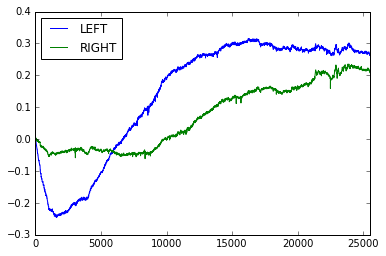

In [132]:
prof.pdf.plot()

In [295]:
left = prof.pdf.LEFT

In [296]:
f, P = sig.welch(left, prof.fs, nperseg=1024)

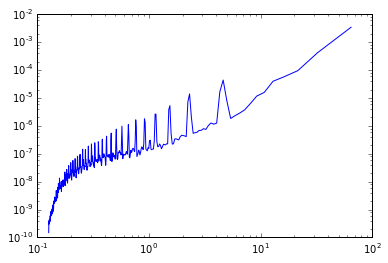

In [297]:
plt.loglog(1/f, P)
plt.show()

In [298]:
left = prof.pdf.RIGHT

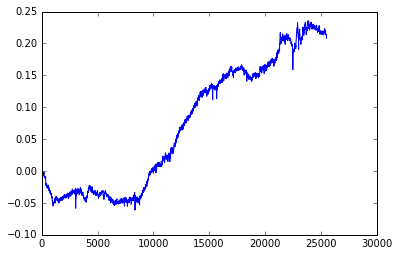

In [289]:
plt.plot(left)

In [299]:
b, a = sig.butter(6, .25, 'high', analog=True)

In [285]:
b, a = sig.butter(6, 60., 'low', analog=True)

In [278]:
b, a = sig.butter(9, [60, .25], 'band', analog=True)

In [300]:
left = sig.lfilter(b,a,left)

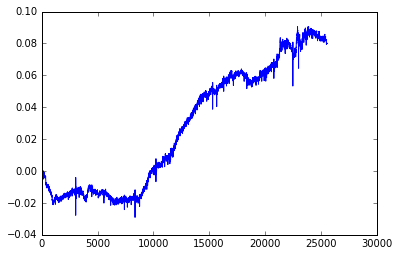

In [292]:
plt.plot(left)

In [283]:
left

array([  1.09460612e+011,   3.78798858e+013,   6.54855477e+015,
         7.37923478e+017,   5.94796441e+019,   3.54424910e+021,
         1.55449318e+023,   4.78590070e+024,   8.94530620e+025,
         4.65846387e+026,  -1.58310359e+028,  -1.81029460e+029,
         1.04764384e+030,   1.95430107e+031,  -8.15202197e+030,
        -1.09156133e+033,  -5.14605542e+033,   1.64512033e+034,
         1.03119375e+043,   3.56854382e+045,   6.14134339e+047,
         6.85539221e+049,   5.43721724e+051,   3.15260053e+053,
         1.31551683e+055,   3.63374505e+056,   4.68632450e+057,
        -6.52673843e+058,  -3.22463523e+060,  -1.28200537e+061,
         7.70944369e+062,   6.49931136e+063,  -1.12894430e+065,
        -1.29492676e+066,   1.15248737e+067,   1.70427089e+068,
         9.71454024e+074,   3.36181171e+077,   5.75933542e+079,
         6.36747851e+081,   4.96639332e+083,   2.79688568e+085,
         1.10322871e+087,   2.64606412e+088,   1.26356435e+089,
        -1.42734223e+091,  -3.77254210e+

In [282]:
left = left[~np.isnan(left)]

In [301]:
f, P = sig.welch(left, prof.fs, nperseg=1024)
#f, P = sig.welch(left, prof.fs)

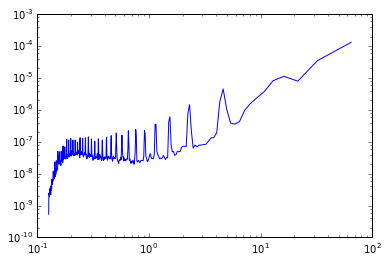

In [302]:
plt.loglog(1/f,P)
plt.show()

In [82]:
x=prof.pdf.index*prof.dx

In [109]:
#window = [-1, 1]
#slope = np.convolve(left, window, mode='same') / np.convolve(x, window, mode='same')
slope = np.gradient(left, prof.dx)

In [110]:
slope

array([-0.00017398, -0.00742328, -0.00983488, ..., -0.0020153 ,
        0.00281756,  0.00040113])

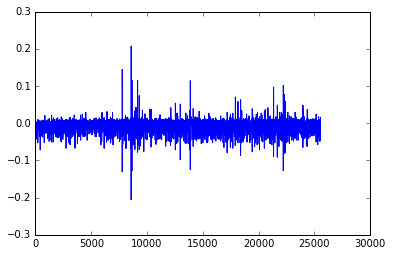

In [111]:
plt.plot(slope)

In [112]:
len(slope)

25544

In [113]:
f, P = sig.welch(slope, prof.fs, nperseg=1024)

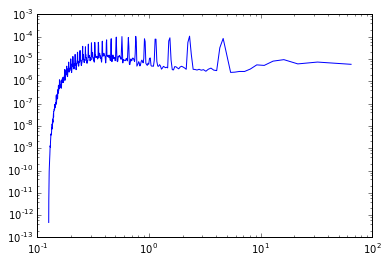

In [114]:
plt.loglog(1/f,P)
plt.show()

In [92]:
window = [-1, 0, 1]
curve = np.convolve(slope, window, mode='same') / np.convolve(x, window, mode='same')

In [93]:
len(curve)

25544

In [94]:
f, P = sig.welch(curve, prof.fs, nperseg=1024)

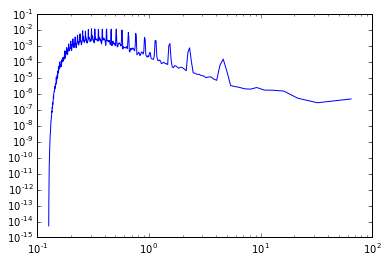

In [95]:
plt.loglog(1/f,P)
plt.show()